## Final Project Submission

Please fill out:
* Student name: Kai Graham
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


In [117]:
# Your code here - remember to use markdown cells for comments as well!
# Predict housing prices to be used by PE shop looking to make purchases.

In [118]:
# import necessary libraries

import pandas as pd
import pandas.util.testing as tm #remove errors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [119]:
# import dataset

data = pd.read_csv('kc_house_data.csv')

In [120]:
# look at dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [121]:
# look at price to get a sense of what we want to predict and its distribution, etc.
data['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

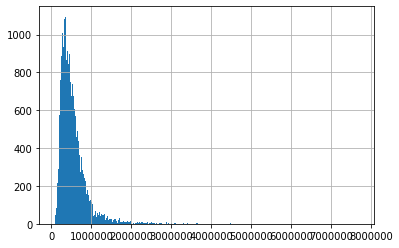

In [122]:
data['price'].hist(bins='auto')

75% of houses in the dataset are 645K or less. As an investor, looking to value houses for entry in the market, will be more focused on houses less than $1M (will go farther and allow money to go to work more)

In [123]:
# remove all houses with prices greater than $1M
houses_data = data.loc[data['price'] <= 1000000]

In [124]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20139 non-null  int64  
 1   date           20139 non-null  object 
 2   price          20139 non-null  float64
 3   bedrooms       20139 non-null  int64  
 4   bathrooms      20139 non-null  float64
 5   sqft_living    20139 non-null  int64  
 6   sqft_lot       20139 non-null  int64  
 7   floors         20139 non-null  float64
 8   waterfront     17912 non-null  float64
 9   view           20082 non-null  float64
 10  condition      20139 non-null  int64  
 11  grade          20139 non-null  int64  
 12  sqft_above     20139 non-null  int64  
 13  sqft_basement  20139 non-null  object 
 14  yr_built       20139 non-null  int64  
 15  yr_renovated   16562 non-null  float64
 16  zipcode        20139 non-null  int64  
 17  lat            20139 non-null  float64
 18  long  

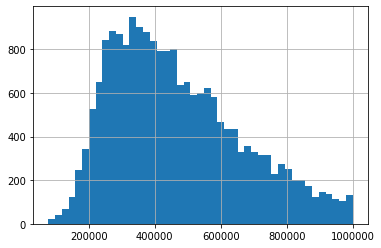

In [125]:
# look at the histogram
houses_data['price'].hist(bins='auto')

In [126]:
houses_data['price'].describe()

count      20139.000000
mean      467970.857441
std       196495.025672
min        78000.000000
25%       314700.000000
50%       435000.000000
75%       594000.000000
max      1000000.000000
Name: price, dtype: float64

The median house price is still relatively inline with where it was before removing the upper set of houses

In [127]:
houses_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [128]:
# remove ID column as it is not relevant
houses_data = houses_data.drop(columns='id')

In [129]:
houses_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [130]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20139 non-null  object 
 1   price          20139 non-null  float64
 2   bedrooms       20139 non-null  int64  
 3   bathrooms      20139 non-null  float64
 4   sqft_living    20139 non-null  int64  
 5   sqft_lot       20139 non-null  int64  
 6   floors         20139 non-null  float64
 7   waterfront     17912 non-null  float64
 8   view           20082 non-null  float64
 9   condition      20139 non-null  int64  
 10  grade          20139 non-null  int64  
 11  sqft_above     20139 non-null  int64  
 12  sqft_basement  20139 non-null  object 
 13  yr_built       20139 non-null  int64  
 14  yr_renovated   16562 non-null  float64
 15  zipcode        20139 non-null  int64  
 16  lat            20139 non-null  float64
 17  long           20139 non-null  float64
 18  sqft_l

In [131]:
# handle missing values - - waterfront, yr_renovated are the only columns missing values
houses_data['waterfront'].nunique()

2

In [132]:
houses_data['waterfront'].unique()

array([nan,  0.,  1.])

In [135]:
# check how many are missing
houses_data['waterfront'].isna().sum()

2227

In [138]:
# 11% of the data is NaN, don't want to drop this many rows - - set all NaNs as 0

In [139]:
# assuming that NaNs in the waterfront column are related to houses that do not have waterfront
# will relabel all NaNs as 0
houses_data['waterfront'] = houses_data['waterfront'].fillna(value=0.)

In [140]:
# check there are no more missing values
houses_data['waterfront'].isna().any()

False

In [141]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20139 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20139 non-null  object 
 1   price          20139 non-null  float64
 2   bedrooms       20139 non-null  int64  
 3   bathrooms      20139 non-null  float64
 4   sqft_living    20139 non-null  int64  
 5   sqft_lot       20139 non-null  int64  
 6   floors         20139 non-null  float64
 7   waterfront     20139 non-null  float64
 8   view           20082 non-null  float64
 9   condition      20139 non-null  int64  
 10  grade          20139 non-null  int64  
 11  sqft_above     20139 non-null  int64  
 12  sqft_basement  20139 non-null  object 
 13  yr_built       20139 non-null  int64  
 14  yr_renovated   16562 non-null  float64
 15  zipcode        20139 non-null  int64  
 16  lat            20139 non-null  float64
 17  long           20139 non-null  float64
 18  sqft_l

In [142]:
# look at yr_renovated
houses_data['yr_renovated'].nunique()

70

In [143]:
houses_data['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2013., 1994., 1978., 2005., 2003.,
       1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988., 1977.,
       1981., 1995., 2000., 1999., 1970., 1989., 2004., 1986., 2007.,
       1987., 1985., 2001., 1980., 1992., 1971., 1979., 1997., 2010.,
       1950., 1969., 1948., 2009., 2006., 2015., 1974., 2008., 2012.,
       1968., 1963., 1951., 1962., 1953., 1993., 1998., 1996., 1955.,
       1982., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1956., 1967., 1965., 1934., 1972., 1944., 1958.])

In [144]:
# fill NaNs with 0.
houses_data['yr_renovated'] = houses_data['yr_renovated'].fillna(value=0.)

In [145]:
# should be no more missing values
houses_data.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view              True
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [146]:
# view is missing some values - - how many are missing?
houses_data['view'].isna().sum()

57

In [147]:
# only 57 are missing - - remove all entries without view
houses_data['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [148]:
houses_data = houses_data.dropna()

In [149]:
houses_data.isna().any()

date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [150]:
# no more missing values - - check for duplicates
houses_data.duplicated().any()

False

In [151]:
# no duplicates

In [152]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20082 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           20082 non-null  object 
 1   price          20082 non-null  float64
 2   bedrooms       20082 non-null  int64  
 3   bathrooms      20082 non-null  float64
 4   sqft_living    20082 non-null  int64  
 5   sqft_lot       20082 non-null  int64  
 6   floors         20082 non-null  float64
 7   waterfront     20082 non-null  float64
 8   view           20082 non-null  float64
 9   condition      20082 non-null  int64  
 10  grade          20082 non-null  int64  
 11  sqft_above     20082 non-null  int64  
 12  sqft_basement  20082 non-null  object 
 13  yr_built       20082 non-null  int64  
 14  yr_renovated   20082 non-null  float64
 15  zipcode        20082 non-null  int64  
 16  lat            20082 non-null  float64
 17  long           20082 non-null  float64
 18  sqft_l

In [153]:
# handle strings - - convert to appropriate types
houses_data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '?', '730.0', '1700.0', '300.0', '970.0',
       '760.0', '700.0', '820.0', '780.0', '790.0', '330.0', '1620.0',
       '360.0', '1510.0', '410.0', '990.0', '600.0', '560.0', '550.0',
       '1000.0', '500.0', '1040.0', '880.0', '1010.0', '240.0', '265.0',
       '290.0', '800.0', '540.0', '840.0', '380.0', '480.0', '570.0',
       '1490.0', '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0',
       '1130.0', '450.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '390.0', '430.0', '210.0',
       '440.0', '220.0', '1160.0', '860.0', '580.0', '2060.0', '1180.0',
       '200.0', '1150.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0',
       '960.0', '870.0', '280.0', '1200.0', '1100.0', '460.0', '770.0',
       '1400.0', '720.0', '660.0', '1220.0', '900.0', '420.0', '1580.0',
       '1380.0', '475.0', '690.0', '270.0', '350.0', '1370.0', '850.0',
       '1470.0', '160.0', '950.0', '50.0', '740.0', '710.0

In [154]:
# need to remove the entries with ?
# check how many there are
houses_data.loc[houses_data['sqft_basement'] == '?'].count()

date             422
price            422
bedrooms         422
bathrooms        422
sqft_living      422
sqft_lot         422
floors           422
waterfront       422
view             422
condition        422
grade            422
sqft_above       422
sqft_basement    422
yr_built         422
yr_renovated     422
zipcode          422
lat              422
long             422
sqft_living15    422
sqft_lot15       422
dtype: int64

In [155]:
# only 422 entries out of 20,000 - - remove these
houses_data = houses_data.loc[houses_data['sqft_basement'] != '?']

In [156]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19660 non-null  object 
 1   price          19660 non-null  float64
 2   bedrooms       19660 non-null  int64  
 3   bathrooms      19660 non-null  float64
 4   sqft_living    19660 non-null  int64  
 5   sqft_lot       19660 non-null  int64  
 6   floors         19660 non-null  float64
 7   waterfront     19660 non-null  float64
 8   view           19660 non-null  float64
 9   condition      19660 non-null  int64  
 10  grade          19660 non-null  int64  
 11  sqft_above     19660 non-null  int64  
 12  sqft_basement  19660 non-null  object 
 13  yr_built       19660 non-null  int64  
 14  yr_renovated   19660 non-null  float64
 15  zipcode        19660 non-null  int64  
 16  lat            19660 non-null  float64
 17  long           19660 non-null  float64
 18  sqft_l

In [157]:
# now need to convert basement column to a number format
houses_data['sqft_basement'] = houses_data['sqft_basement'].astype('float64')

In [158]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19660 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19660 non-null  object 
 1   price          19660 non-null  float64
 2   bedrooms       19660 non-null  int64  
 3   bathrooms      19660 non-null  float64
 4   sqft_living    19660 non-null  int64  
 5   sqft_lot       19660 non-null  int64  
 6   floors         19660 non-null  float64
 7   waterfront     19660 non-null  float64
 8   view           19660 non-null  float64
 9   condition      19660 non-null  int64  
 10  grade          19660 non-null  int64  
 11  sqft_above     19660 non-null  int64  
 12  sqft_basement  19660 non-null  float64
 13  yr_built       19660 non-null  int64  
 14  yr_renovated   19660 non-null  float64
 15  zipcode        19660 non-null  int64  
 16  lat            19660 non-null  float64
 17  long           19660 non-null  float64
 18  sqft_l

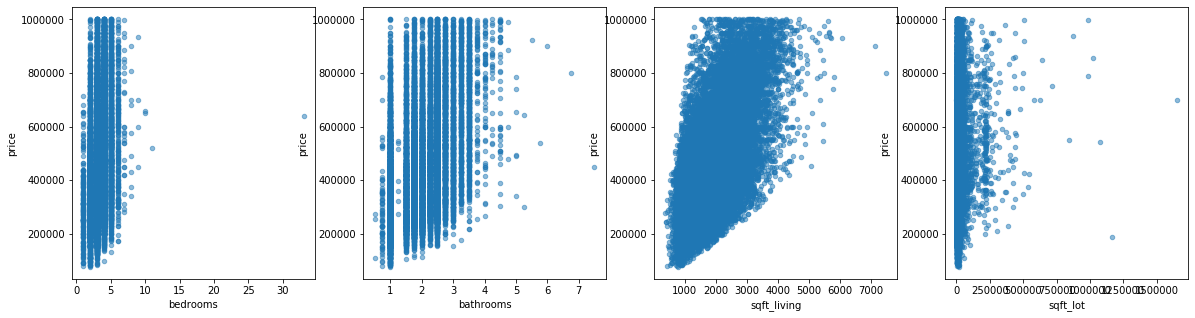

In [159]:
# now the only string column we have is the date column
# begin visualizations and plotting against price to see which may be solid predictors to begin with and 
# which may need log normalization, etc.
# will need to normalize / scale
# will need to split cat and continuous variables

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    houses_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

In [160]:
# only two houses that are greater than 10 bedrooms so remove these
houses_data = houses_data.loc[houses_data['bedrooms'] <= 10]

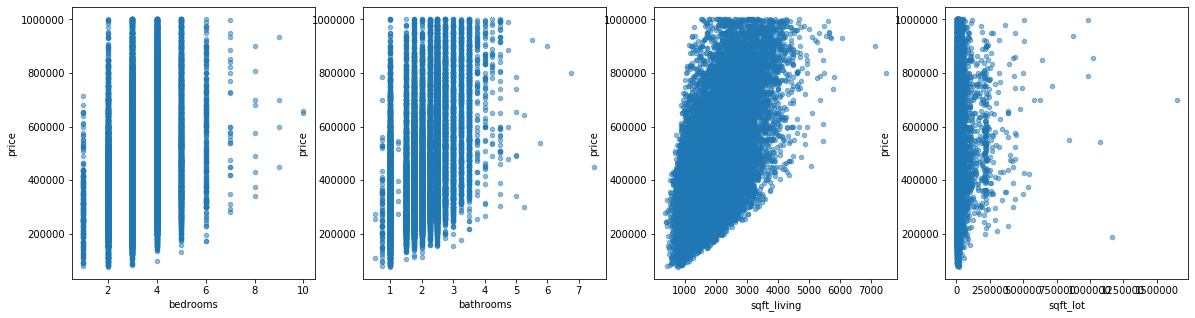

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,5))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], axes):
    houses_data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.5)

plt.show()

In [162]:
houses_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19658 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19658 non-null  object 
 1   price          19658 non-null  float64
 2   bedrooms       19658 non-null  int64  
 3   bathrooms      19658 non-null  float64
 4   sqft_living    19658 non-null  int64  
 5   sqft_lot       19658 non-null  int64  
 6   floors         19658 non-null  float64
 7   waterfront     19658 non-null  float64
 8   view           19658 non-null  float64
 9   condition      19658 non-null  int64  
 10  grade          19658 non-null  int64  
 11  sqft_above     19658 non-null  int64  
 12  sqft_basement  19658 non-null  float64
 13  yr_built       19658 non-null  int64  
 14  yr_renovated   19658 non-null  float64
 15  zipcode        19658 non-null  int64  
 16  lat            19658 non-null  float64
 17  long           19658 non-null  float64
 18  sqft_l

In [173]:
"""
Function to plot y vs. a chosen set of x variables
"""

def plot_x_y(x_vals, y_val):
    fig, axes = plt.subplots(nrows = 1, ncols=len(x_vals), figsize=(20,5))
    for xcol, ax in zip(x_vals, axes):
        houses_data.plot(kind='scatter', x=xcol, y=y_val, ax=ax, alpha=0.5)
    plt.tight_layout()
    plt.show()

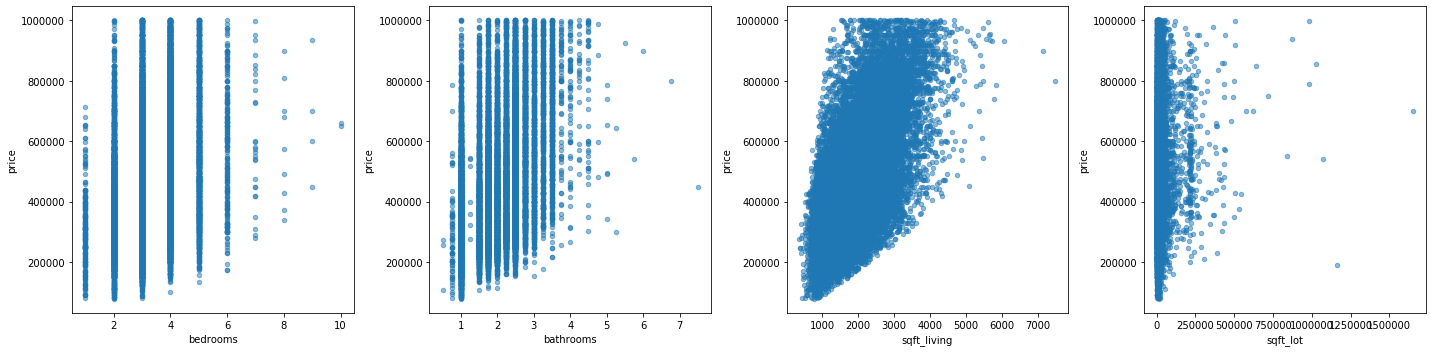

In [175]:
plot_x_y(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], 'price')

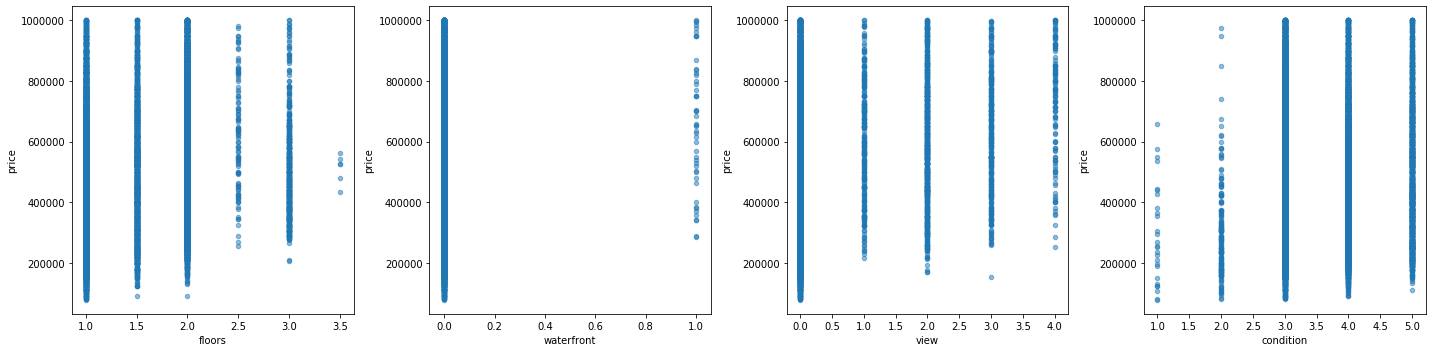

In [176]:
plot_x_y(['floors', 'waterfront', 'view', 'condition'], 'price')

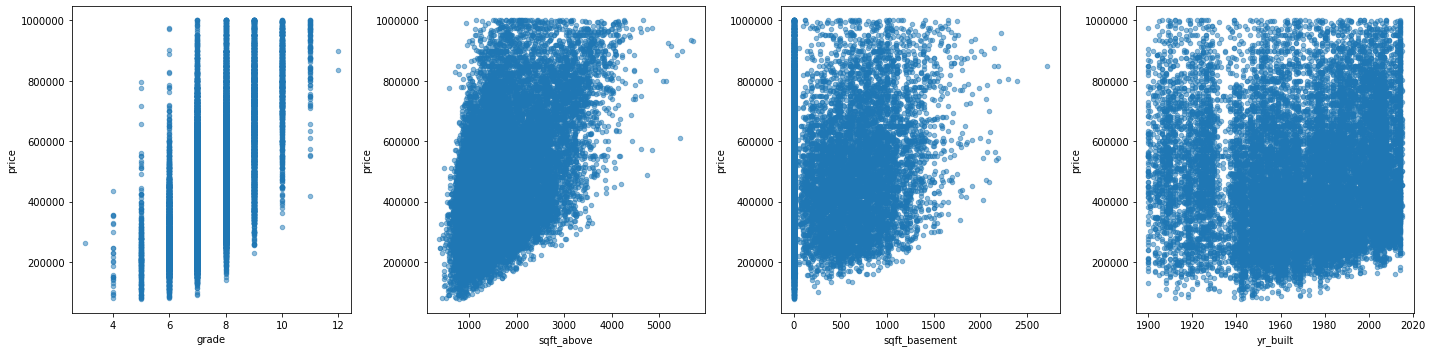

In [178]:
plot_x_y(['grade', 'sqft_above', 'sqft_basement', 'yr_built'], 'price')

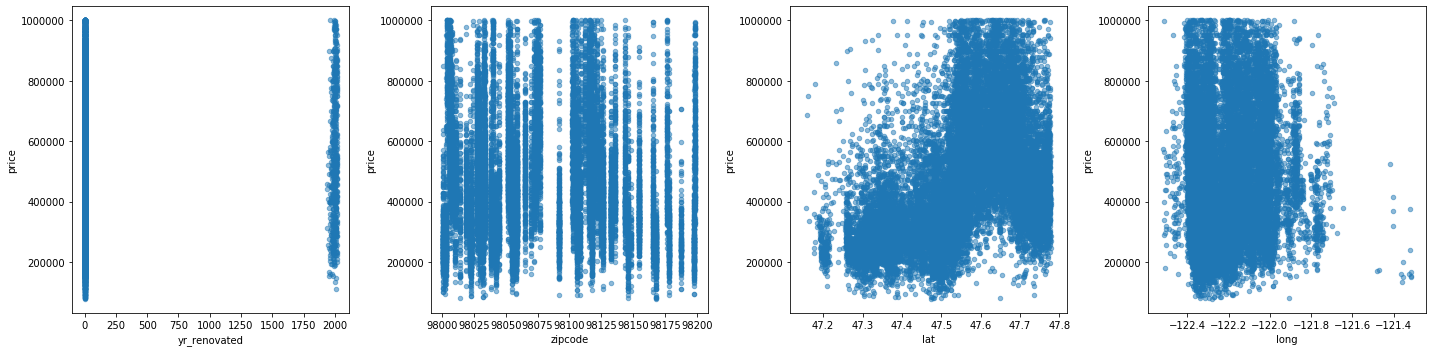

In [179]:
plot_x_y(['yr_renovated', 'zipcode', 'lat', 'long'], 'price')

In [181]:
# clear continuouse variables from these plots appear to be sqft_living, sqft_lot, sqft_above, sqft_basement,
# lat, and long - - it also seems like there may be some polynomial relationship between lat and price
cont_variables = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long']

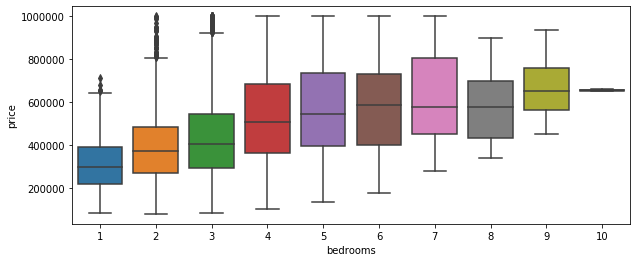

In [214]:
# evaluate other columns for ordinal relationships - if ordinal, will treat as a single column, otherwise 
# create dummy vars
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='bedrooms', y='price', data=houses_data)

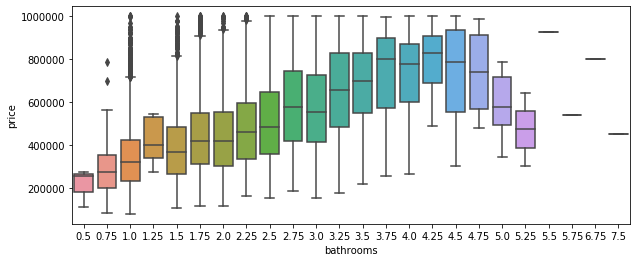

In [211]:
plt.figure(figsize=(10, 4))
ax = sns.boxplot(x='bathrooms', y='price', data=houses_data)
plt.show()

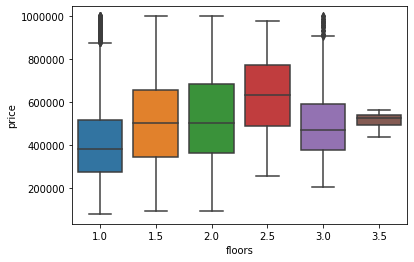

In [202]:
ax = sns.boxplot(x='floors', y='price', data=houses_data)

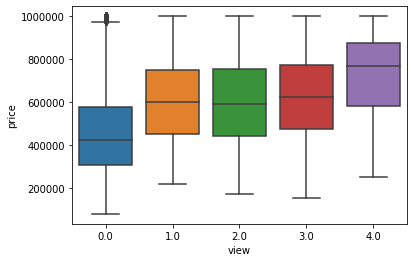

In [203]:
ax = sns.boxplot(x='view', y='price', data=houses_data)

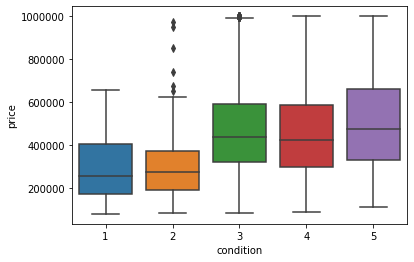

In [204]:
ax = sns.boxplot(x='condition', y='price', data=houses_data)

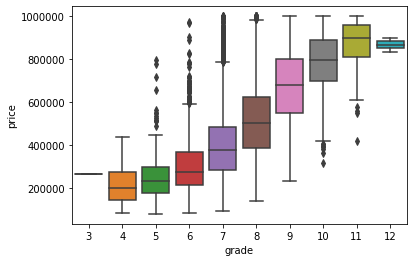

In [206]:
ax = sns.boxplot(x='grade', y='price', data=houses_data)

In [207]:
# check how many data points have a grade of 12
houses_data.loc[houses_data['grade'] == 12]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1292,7/3/2014,835000.0,4,4.25,4930,25714,2.0,0.0,0.0,3,12,4930,0.0,2005,0.0,98092,47.3069,-122.148,3620,23035
21034,2/19/2015,900000.0,5,6.00,7120,40806,2.0,0.0,4.0,3,12,5480,1640.0,2007,0.0,98006,47.5451,-122.114,3440,36859


In [208]:
# there are only two - - remove these
houses_data = houses_data.loc[houses_data['grade'] < 12]

In [209]:
# check this worked
houses_data.loc[houses_data['grade'] == 12]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


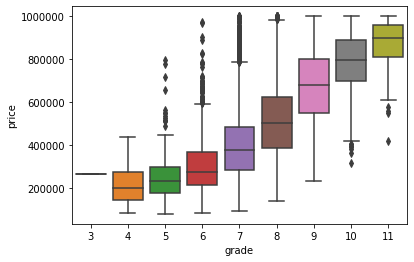

In [210]:
ax = sns.boxplot(x='grade', y='price', data=houses_data)

In [215]:
# create dummies and scale / normalize where needed